In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [3]:
df = pd.read_csv('C:\\Users\\tech\\Desktop\\MoroccoEconomyYTAnalysis\\data\\cleaned_dataset.csv')


In [7]:
df['text_from_tokens'] = df['tokens'].apply(' '.join)

In [12]:
# Assuming you've loaded your dataframe as 'df'
df.head()



,subtitles,tokens,text_from_tokens
0,madame monsieur bonsoir les marocains résiden...,"['madame', 'monsieur', 'bonsoir', 'marocains',...","[ ' m a d a m e ' , ' m o n s i e u r ' , ..."
1,prépondérant dans léconomie le système bancai...,"['prépondérant', 'léconomie', 'système', 'banc...","[ ' p r é p o n d é r a n t ' , ' l é c o n ..."
2,bon mais messieurs bonsoir et bienvenue d...,"['bon', 'messieurs', 'bonsoir', 'bienvenue', '...","[ ' b o n ' , ' m e s s i e u r s ' , ' b ..."
3,en tout bonsoir à toutes et à tous et rendez ...,"['tout', 'bonsoir', 'toutes', 'tous', 'rendez'...","[ ' t o u t ' , ' b o n s o i r ' , ' t o ..."
4,merci tout dabord davoir répondu à notre ap...,"['merci', 'tout', 'dabord', 'davoir', 'répondu...","[ ' m e r c i ' , ' t o u t ' , ' d a b o ..."


In [18]:
# Convert the text to a regular sentence form
df['text_from_tokens'] = df['text_from_tokens'].apply(lambda x: ' '.join(word.replace(" ", "") for word in x.strip("[]").split(",")))

# Check the conversion
print(df['text_from_tokens'].sample(10))

# Retry the TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=None)
X_tfidf = vectorizer.fit_transform(df['text_from_tokens'])
print(f"Shape of TF-IDF Matrix: {X_tfidf.shape}")



21    'si' 'limite' 'dit' 'textuellement' 'linstrume...
32    'lannée' 'sannonce' 'économiquement' 'difficil...
1     'prépondérant' 'léconomie' 'système' 'bancaire...
3     'tout' 'bonsoir' 'toutes' 'tous' 'rendez' 'ret...
33    'deux' 'façades' 'maritimes' 'sans' 'littoral'...
27    'enchaînement' 'projets' 'économiques' 'unis' ...
6     'bienvenue' 'projet' 'maroc' 'chaîne' 'présent...
15    'bonjour' 'toutes' 'tous' 'bienvenue' 'grand' ...
49    'bonjour' 'bonjour' 'alors' 'expert' 'domaine'...
23    'lenvironnement' 'actuel' 'caractérisé' 'a' 'e...
Name: text_from_tokens, dtype: object
Shape of TF-IDF Matrix: (56, 11442)


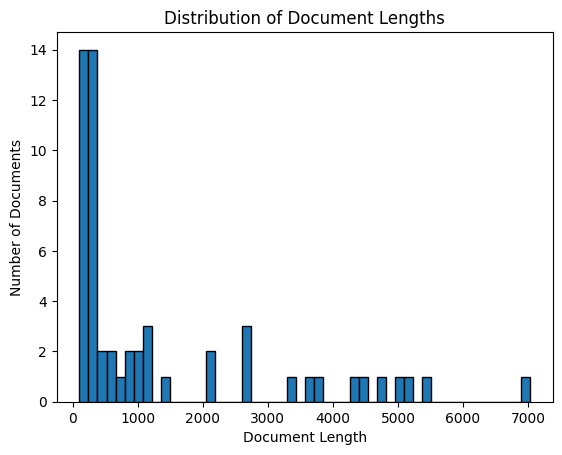

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing the distribution of document lengths
document_lengths = df['text_from_tokens'].str.split().apply(len)
plt.hist(document_lengths, bins=50, edgecolor='k')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.show()



C:\Users\tech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


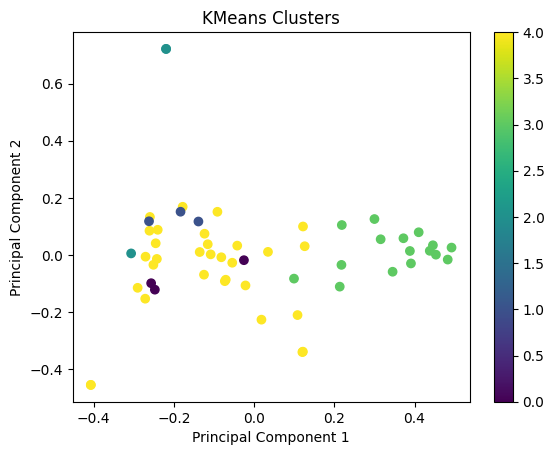

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Let's assume you want to try with 5 clusters (you can change this)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X_tfidf)

# Visualizing using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_tfidf.toarray())

# Plotting clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=km.labels_)
plt.title('KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

